In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sp
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px

In [2]:
df=pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

# Eda

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [5]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
df_new=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df_new

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

# Visualisation

In [7]:
px.histogram(df_new[['Age_08_04']],labels={"value":'Age_08_04'})

In [8]:
px.line(df_new["Price"])

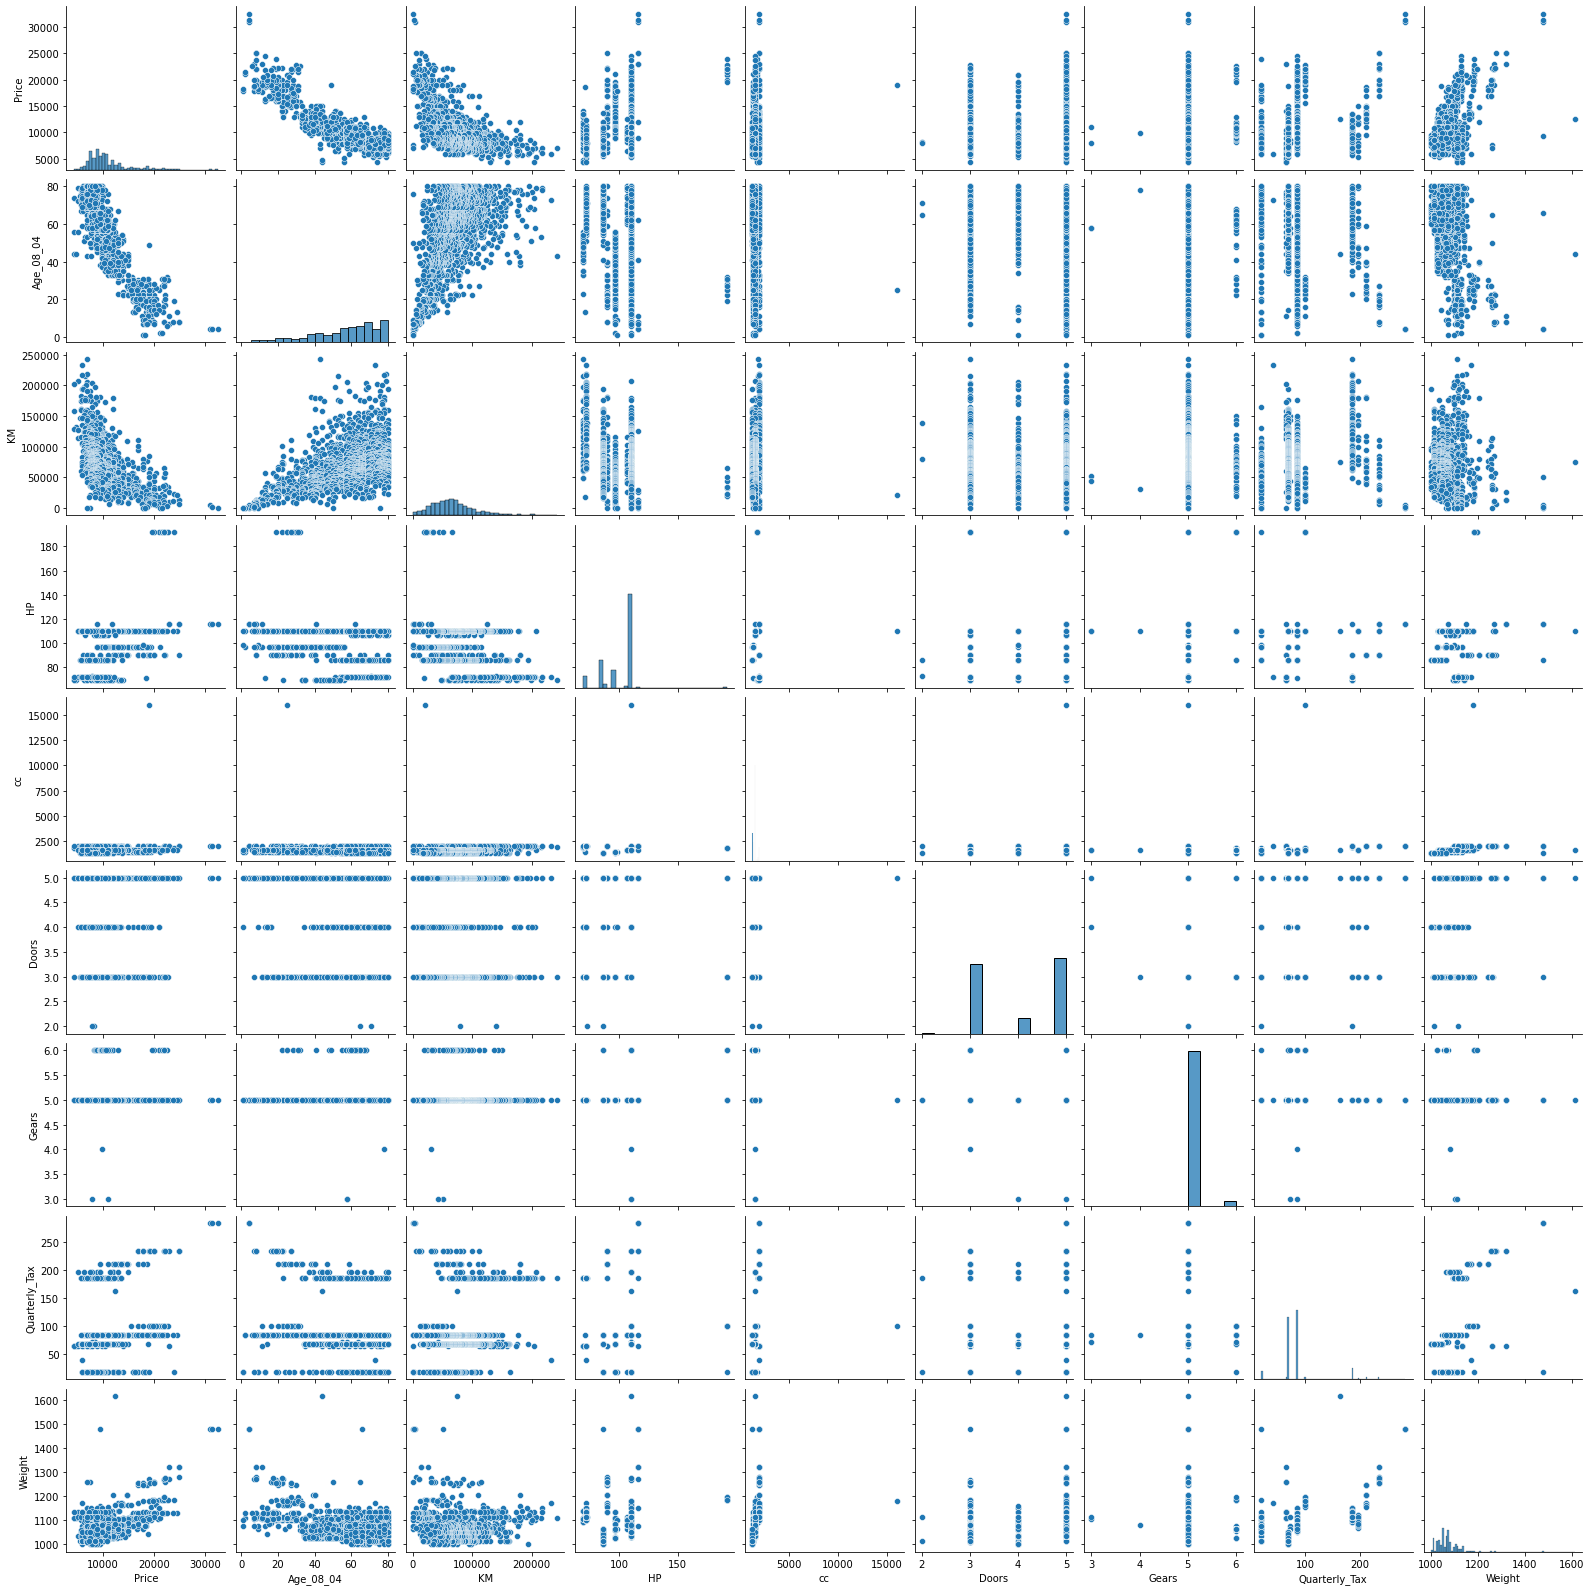

In [9]:
sp.pairplot(df_new)

# Feature Engineering

# Search Duplicate

In [10]:
d=df_new[df_new.duplicated()]

In [11]:
d

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
113  24950          8  13253  116  2000      5      5            234    1320

In [12]:
df_new.drop([113], axis=0, inplace=True)

C:\Users\DHAVAL\AppData\Local\Temp\ipykernel_1744\2661741264.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
df_new.duplicated().sum()

0

# Finding Correlation

In [14]:
df_new.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876273 -0.569420  0.314134  0.124375  0.183604   
Age_08_04     -0.876273   1.000000  0.504575 -0.155293 -0.096549 -0.146929   
KM            -0.569420   0.504575  1.000000 -0.332904  0.103822 -0.035193   
HP             0.314134  -0.155293 -0.332904  1.000000  0.035207  0.091803   
cc             0.124375  -0.096549  0.103822  0.035207  1.000000  0.079254   
Doors          0.183604  -0.146929 -0.035193  0.091803  0.079254  1.000000   
Gears          0.063831  -0.005629  0.014890  0.209642  0.014732 -0.160101   
Quarterly_Tax  0.211508  -0.193319  0.283312 -0.302287  0.305982  0.107353   
Weight         0.575869  -0.466484 -0.023969  0.087143  0.335077  0.301734   

                  Gears  Quarterly_Tax    Weight  
Price          0.063831       0.211508  0.575869  
Age_08_04     -0.005629      -0.193319 -0.466484  
KM             0.014890       0.283312 -0.023969  
HP             0.209642      -0.302287  0.087143  
cc             0.014732       0.305982  0.335077  
Doors         -0.160101       0.107353  0.301734  
Gears          1.000000      -0.005125  0.021238  
Quarterly_Tax -0.005125       1.000000  0.621988  
Weight         0.021238       0.621988  1.000000

<AxesSubplot:>

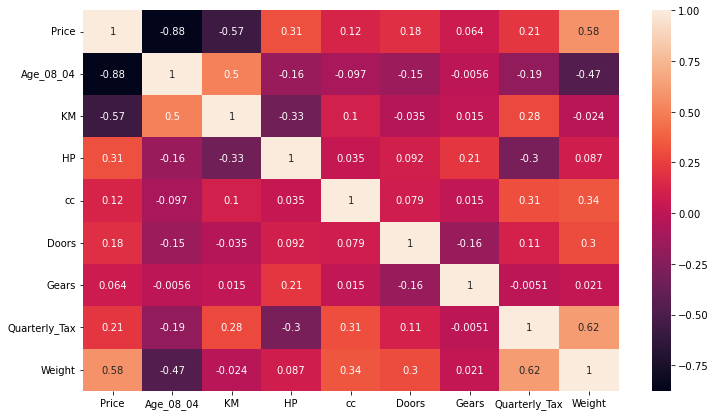

In [15]:
plt.figure(figsize=(12,7))
sp.heatmap(df_new.corr(),annot=True)

In [16]:
df_new.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

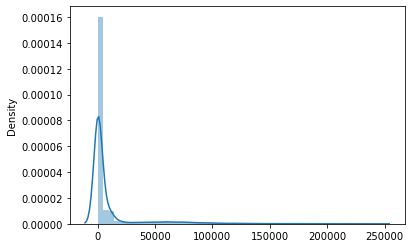

In [17]:
sp.distplot(df_new)

# Transformation and scaling

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

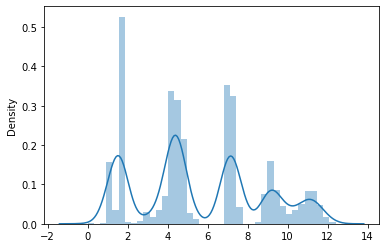

In [18]:
log=np.log(df_new)
sp.distplot(log)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

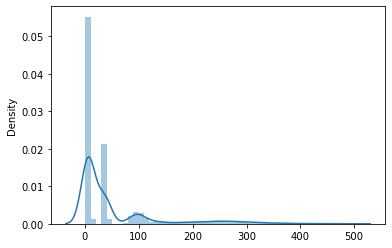

In [19]:
sqrt=np.sqrt(df_new)
sp.distplot(sqrt)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



array([[0.3250444 , 0.27848101, 0.19335471, ..., 0.66666667, 0.72348485,
        0.26829268],
       [0.3339254 , 0.27848101, 0.30014938, ..., 0.66666667, 0.72348485,
        0.26829268],
       [0.3410302 , 0.29113924, 0.1716468 , ..., 0.66666667, 0.72348485,
        0.26829268],
       ...,
       [0.14742451, 0.88607595, 0.07002086, ..., 0.66666667, 0.18939394,
        0.02439024],
       [0.10301954, 0.87341772, 0.06960934, ..., 0.66666667, 0.18939394,
        0.02439024],
       [0.09236234, 0.94936709, 0.        , ..., 0.66666667, 0.        ,
        0.18536585]])

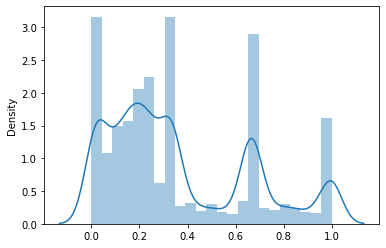

In [20]:
scale=MinMaxScaler()
norm=scale.fit_transform(df_new)
sp.distplot(norm)
norm

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



array([[ 0.77036821, -1.77726827, -0.57595832, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.83966875, -1.77726827,  0.11647404, ..., -0.14047507,
         3.00351318,  1.77496405],
       [ 0.89510918, -1.72337979, -0.71670745, ..., -0.14047507,
         3.00351318,  1.77496405],
       ...,
       [-0.61564265,  0.80937864, -1.37562683, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-0.96214536,  0.75549016, -1.37829506, ..., -0.14047507,
        -0.44010431, -1.09674669],
       [-1.04530601,  1.07882103, -1.82962616, ..., -0.14047507,
        -1.66124526,  0.7985824 ]])

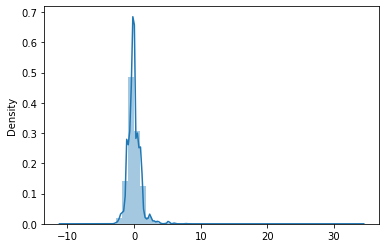

In [21]:
scale2=StandardScaler()
stand=scale2.fit_transform(df_new)
sp.distplot(stand)
stand

In [23]:
df_new[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight']]=stand

C:\Users\DHAVAL\AppData\Local\Temp\ipykernel_1744\473702066.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
x=df_new[['Age_08_04', 'KM', 'HP', "cc",'Gears','Quarterly_Tax', 'Weight']]

In [25]:
y=df_new["Price"]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
pred=model.predict(x_test)
pred

array([-1.94446972e-02, -8.94808032e-02, -3.21355185e-01, -3.34820884e-01,
       -6.02733031e-01, -6.56845602e-01, -6.79094810e-01, -6.50381572e-01,
        3.17736408e-01,  4.99418337e-01, -3.80332813e-01, -3.50529362e-01,
        7.10518562e-01,  4.74540227e-01, -5.26132768e-01,  2.59345580e-01,
        4.69665697e-01,  1.86891558e+00,  1.25662142e-01,  2.61596535e-01,
        2.80439463e-01,  1.99599878e+00, -2.10342851e-01, -4.44423870e-02,
       -9.38147969e-01,  1.43983850e+00, -9.90384315e-01, -5.80328279e-01,
        1.29790336e+00,  8.87374043e-01, -7.08151719e-01,  8.59583431e-02,
       -1.48112222e-01, -1.55873283e-01, -1.45818784e-01, -5.83296941e-01,
       -4.82729282e-01, -1.93432413e-01,  1.49153777e+00,  1.08326122e-02,
       -5.84353467e-01, -3.11064407e-01, -1.60128476e-01, -6.02115988e-01,
       -5.81478164e-03,  1.83530766e+00, -1.89713723e-01, -5.19907186e-01,
        5.35109342e-02,  6.09693822e-01,  6.29002007e-01, -1.21199862e+00,
        1.07346751e+00,  

In [30]:
test=model.score(x_test,y_test)*100
test

85.91735276800216

In [31]:
train=model.score(x_train,y_train)*100
train

86.38495404549845

In [32]:
data={
    "Model":["Train data Model","Test Data Model"]
}

In [33]:
df_final=pd.DataFrame(data)
df_final

Model
0  Train data Model
1   Test Data Model

In [174]:
df_final["R squared error"]=train,test

# Final dataframe showcasing r^2 scores

In [175]:
df_final

Model  R squared error
0  Train data Model        86.384954
1   Test Data Model        85.917353